In [1]:
import vaex
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit
from os.path import join, abspath
import sys
from os import pardir, mkdir
from tqdm import tqdm

In [2]:
root_dir = abspath(pardir)
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if sys.path is not root_dir:
    sys.path.append(root_dir)

sys.path

['/home2/s20321005/Thesis-Project/4_Vertical_Velocity',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import safe_mkdir, style

In [5]:
style()

In [6]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [7]:
spectral_dir = join(root_data_dir, "Spectral-Class-Cluster-no")
spectral_dir

'/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no'

In [8]:
name = "Velocity-Distribution-no"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no already exist. Good to go!


In [9]:
files = glob(join(spectral_dir, "*.hdf5"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(-0.10)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.10)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.16)_(0.20).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.20)_(0.23).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.23)_(0.26).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.26)_(0.28).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.28)_(0.30).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.30)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Spectral-Class-Cluster-no/gaia_(0.36)_(0.37).hdf5'

In [10]:
index = 0
gaia_raw = vaex.open(files[index])
gaia_raw

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_rv,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.01692606345950085,0.3891393605162341,7.978000164031982,7.916999816894531,AAA,2847236045035991808,7.534960746765137,0.31428973130157245,0.028740057721734047,-7.528403412132262,0.035291653126478195,5.414626649593402,0.03218960762023926,8.257993698120117,8.308849334716797,8.131924629211426,1606.518310546875,3663.614990234375,1.0435644388198853,1.1647926568984985,-1.2447639901461083,-0.6851463533673376,185.764404296875,183.57119750976562,187.21949768066406,0.40720000863075256,0.4049000144004822,0.41269999742507935,nan,nan,nan,A,--,-1.9623053073883057,gaia,0.8112114071846008,0.8112114071846008,1.0,10111.888671875,gspphot,14.7001953125,61.91796875,0.0,4.351399898529053,gspphot,0.004600048065185547,0.0062999725341796875,0.0,nan,--,nan,nan,nan,0.04969999939203262,gspphot,0.06459999922662973,0.016599997878074646,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.06100034713745117,1.6458427462058371,184.68494038736586,-116.86610814118873,143.00643333017175,-1.4773945887055326,-7.388703621087389,0.02914644273095347,0.03495678152203822,-6.468120044174079,-1.2933209995171295,-0.049143105132327135,-0.026648281766649008,-3.766716399021818,0.8112114071846008,0.5147320000869019,-5.61240292518195,0.6289117267272132,-0.5723895823176695,0.20300791047069605,-5.730978622228241,0.5958421596550898,0.5031712031916151,2.133604850608599
1,0.0035158959649724967,0.5305083072141416,8.081000328063965,8.039999961853027,AAA,2873312200239661568,14.617414474487305,14.451251005288686,0.030547887086868286,-2.1977605786351746,0.020109251141548157,5.780108878698743,0.030021460726857185,8.32446002960205,8.370553970336914,8.213418960571289,1918.97314453125,3164.412841796875,1.0105706453323364,1.161336064338684,-1.2188784047472103,-0.5448464699442576,174.9145965576172,173.51480102539062,177.49130249023438,0.21850000321865082,0.21230000257492065,0.22370000183582306,nan,nan,nan,A,--,2.5488598346710205,gaia,0.5904097557067871,0.5904097557067871,1.0,9139.9169921875,gspphot,26.2587890625,21.2197265625,0.0,4.347700119018555,gspphot,0.006599903106689453,0.003699779510498047,0.0,nan,--,nan,nan,nan,0.040699999779462814,gspphot,0.01589999906718731,0.022099997848272324,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.0410003662109375,1.8906804241222384,173.0071216625813,-89.66730688490979,147.95687960341223,13.569288218458064,-5.435367919770953,0.030094421085801206,0.02078175176582556,-4.457293881549581,11.127545779028823,-0.028747124591811984,0.06284419546046725,-5.132948763366383,0.5904097557067871,0.306987584346683,-0.13035411751851234,0.5051422570554095,-10.490508510988937,0.18384391925197802,3.7132867437359187,0.47467831856972253,0.4207933504122871,2.028376745602959
2,0.016132811314469423,0.8453833320993638,6.625999927520752,6.639999866485596,AAA,393289609837293312,26.449678421020508,-24.96840807175537,0.02289041317999363,-8.72720196130603,0.02212526649236679,7.549027097652189,0.02850569225847721,6.791180610656738,6.807115077972412,6.732668399810791,2223.919189453125,1461.660400390625,0.9565751552581787,1.1588934659957886,-1.1377109201305777,-0.23877740044822038,132.62339782714844,132.01100158691406,133.18209838867188,0.18000000715255737,0.17739999294281006,0.18330000340938568,nan,nan,nan,A,--,-1.7445670366287231,gaia,0.21633543074131012,0.21633543074131012

filter out high error data

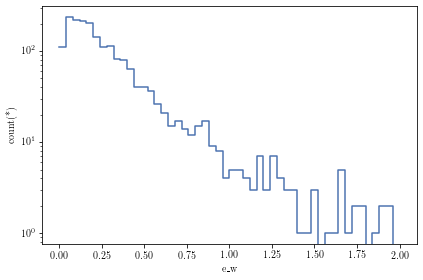

In [11]:
gaia_raw.viz.histogram("e_w", limits=[0, 2], shape=50)
plt.yscale("log")

In [12]:
# only consider stars near the midplane
gaia = gaia_raw.filter("abs(z)<50")
gaia['f'] = gaia_raw.evaluate("e_w/abs(w)")
# either the relative error is less than 10% or the absolute error is less than 1 km/s
mask = (gaia['f']<0.1) | (gaia['e_w']<1) 
gaia = gaia[mask]
gaia = gaia.extract()
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,vb,vphi,e_vb,e_vphi,w,e_rv,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper,f
0,0.016132811314469423,0.8453833320993638,6.625999927520752,6.639999866485596,AAA,393289609837293312,26.449678421020508,-24.96840807175537,0.02289041317999363,-8.72720196130603,0.02212526649236679,7.549027097652189,0.02850569225847721,6.791180610656738,6.807115077972412,6.732668399810791,2223.919189453125,1461.660400390625,0.9565751552581787,1.1588934659957886,-1.1377109201305777,-0.23877740044822038,132.62339782714844,132.01100158691406,133.18209838867188,0.18000000715255737,0.17739999294281006,0.18330000340938568,nan,nan,nan,A,--,-1.7445670366287231,gaia,0.21633543074131012,0.21633543074131012,1.0,9896.3720703125,gspphot,26.314453125,29.6044921875,0.0,4.000199794769287,gspphot,0.0028998851776123047,0.0026001930236816406,0.0,nan,--,nan,nan,nan,-1.312999963760376,gspphot,0.025600075721740723,0.044299960136413574,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,-0.01399993896484375,1.0154548490130217,132.46740103913635,-31.33051301020285,128.70901791475563,-26.169521007775085,-3.8394825087166535,0.022863400441453286,0.022153179301464352,-2.4107937163157125,-16.431723978767078,-0.01662394518201199,-0.06368651554562112,-1.9297782652825481,0.21633543074131012,0.05365549699000003,-2.2652585580374547,0.21023430212550667,13.963999868961707,0.10548031529919125,-8.952075564291684,0.19268714834395329,0.2076695678970682,1.7613016715114636,0.027803969997632898
1,0.007327607784865514,1.0824205120699932,7.697999954223633,7.6020002365112305,AAA,429910184639924864,30.434906005859375,-9.994043222039021,0.020594893023371696,-28.747219518666515,0.023014497011899948,6.966705618099453,0.022135332226753235,8.100255966186523,8.185784339904785,7.919078350067139,1736.6217041015625,2342.297607421875,0.9306333661079407,1.1676572561264038,-1.0972707084924957,-0.005097484666529203,144.53489685058594,144.37939453125,144.69949340820312,0.6830000281333923,0.6814000010490417,0.6848999857902527,nan,nan,nan,A,--,-0.45222681760787964,gaia,0.47323763370513916,0.47323763370513916,1.0,11437.2587890625,gspphot,23.1826171875,26.4521484375,0.0,4.480500221252441,gspphot,0.0017004013061523438,0.0020999908447265625,0.0,nan,--,nan,nan,nan,-0.4147999882698059,gspphot,0.009000003337860107,0.0073999762535095215,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.09599971771240234,1.9131372520980765,143.53986730858944,-0.7316891038872795,143.5380024175574,-15.319952150479443,-26.29795802121156,0.020688835232181204,0.022930084781581893,-17.89257761899641,-10.423373280566816,-0.05895195986956449,-0.03598550689191674,-17.890039946715522,0.47323763370513916,0.05900052977702957,-0.5434276872756553,0.4732315807438595,9.028630721199267,0.21816967620486805,-5.236969686521851,0.42147962952468204,0.6478736145645947,2.269619798419735,0.0032979540544772023
2,0.007234878441707054,1.2847693604236983,6.0980000495910645,6.019000053405762,AAA,537612876192148096,77.72052764892578,76.77026583536666,0.027028078213334084,-12.116401093805914,0.030883455649018288,14.336634017840032,0.02442546933889389,6.480009078979492,6.557765960693359,6.310624599456787,1129.3505859375,1816.7000732421875,1.1034117937088013,1.1670989990234375,-1.0580185060772953,0.1934567938988277,69.71549987792969,69.51439666748047,69.94170379638672,0.002300000051036477,0.0005000000237487257,0.010999999940395355,nan,na

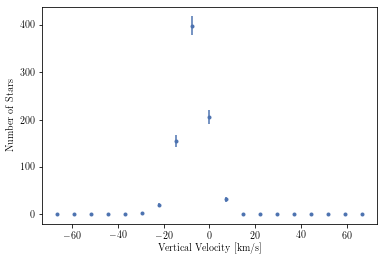

In [13]:
ws = gaia['w'].to_numpy()
wedge = np.linspace(-70, 70, 20)
wmid = (wedge[1:] + wedge[:-1]) / 2
wnum, _ = np.histogram(ws, wedge)
werr = np.sqrt(wnum)
area = wnum.sum() * (wedge[1] - wedge[0])
plt.errorbar(wmid, wnum, yerr=werr, fmt='.')
plt.xlabel("Vertical Velocity [km/s]")
plt.ylabel("Number of Stars")
plt.show()

In [14]:
# fit with double gaussian
from scipy.stats import norm
from scipy.optimize import curve_fit

def gaussian(x, mu, sigma, a):
    return abs(a)*norm.pdf(x, mu, sigma)

def double_gaussian(x, mu, sigma1, a1, sigma2, a2):
    return abs(a1)*norm.pdf(x, mu, sigma1) + abs(a2)*norm.pdf(x, mu, sigma2)

In [18]:
# index = int(input("Index: "))
def get_fit(index, wedge):
    name = files[index].split("/")[-1]
    gaia_raw = vaex.open(files[index])
    gaia = gaia_raw.filter("abs(z)<50")
    gaia['f'] = gaia_raw.evaluate("e_w/abs(w)")
    mask = (gaia['f']<0.1) | (gaia['e_w']<1)
    gaia = gaia[mask]
    gaia = gaia.extract()
    ws = gaia['w'].to_numpy()
    wmid = (wedge[1:] + wedge[:-1]) / 2
    wnum, _ = np.histogram(ws, wedge)
    mask = wnum > 0
    wmid = wmid[mask]
    wnum = wnum[mask]
    print(len(ws), index)
    max = np.max(wnum)

    popt1, _ = curve_fit(gaussian, wmid, wnum/max, p0=[0, 10, 1])
    popt2 = None
    for i in range(100):
        # p0 = np.array([popt1[0], popt1[1]*0.8, popt1[2]*0.8, popt1[1]*1.2, popt1[2]/1.2])
        p0 = [popt1[0], popt1[1], 0.9, 50, 0.07]
        # noise = np.random.normal(0, 0.1, size=len(p0))
        popt, _ = curve_fit(double_gaussian, wmid, wnum/max, p0=p0, maxfev=5000)
        if popt[1] > 1 and popt[3] > 1:
            popt2 = popt
            break
        print('failed to fit', i)
        if i == 99:
            rnd = 0.5
            popt2 = np.array([popt1[0], popt1[1], rnd*popt1[2], popt1[1], (1-rnd)*popt1[2]])

    ws = np.linspace(np.min(wedge),np.max(wedge), 1000)
    fw1 = gaussian(ws, *popt1)
    fw2 = double_gaussian(ws, *popt2)

    werr = np.sqrt(wnum)
    plt.figure(figsize=(10, 6))
    plt.errorbar(wmid, wnum/max, yerr=werr/max, fmt='.')
    plt.plot(ws, fw2, label="Double Gaussian")
    plt.plot(ws, fw1, label="Gaussian")
    plt.plot(ws, gaussian(ws, popt2[0], popt2[1], popt2[2]), label="Gaussian 1", ls="--")
    plt.plot(ws, gaussian(ws, popt2[0], popt2[3], popt2[4]), label="Gaussian 2", ls="--")
    plt.xlabel("Vertical Velocity [km/s]")
    plt.ylabel("Number of Stars")
    plt.ylim(-0.01, np.max(wnum/max)*1.2)
    plt.legend()
    # plt.yscale("log")
    plt.show()
    print("1: mu={:.2f}, sigma={:.2f}, a={:.2f}".format(*popt1))
    print("2: mu={:.2f}, sigma1={:.2f}, a1={:.2f}, sigma2={:.2f}, a2={:.2f}".format(*popt2))

    dic = {
            "mu": popt1[0],
            "sigma": popt1[1],
            "a": abs(popt1[2]),
            "mu_2": popt2[0],
            "sigma1_2": popt2[1],
            "a1_2": abs(popt2[2]),
            "sigma2_2": popt2[3],
            "a2_2": popt2[4],
        }
    df_fit = pd.DataFrame(dic, index=[index])
    df = pd.DataFrame({"wmid": wmid, "wnum": wnum/max, "werr": werr/max})
    return df, df_fit, name

809 0


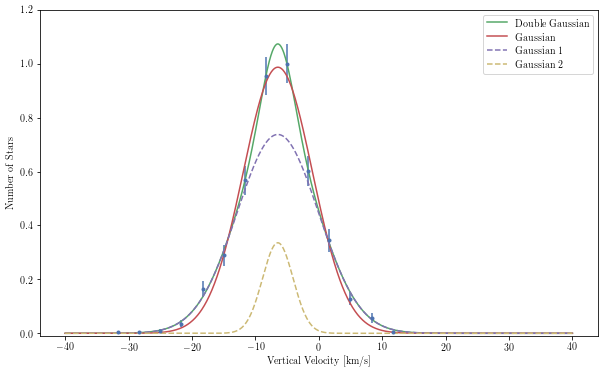

1: mu=-6.45, sigma=5.46, a=13.50
2: mu=-6.46, sigma1=6.43, a1=11.88, sigma2=2.41, a2=2.03
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

In [19]:
wedge = np.linspace(-40, 40, 25)
df, df_fit, name = get_fit(0, wedge)
# df.export(join(data_dir, name), progress=True)
df = vaex.from_pandas(df)
df_fit = vaex.from_pandas(df_fit)

n = name.split("_")
name = f"w_{n[1]}_{n[2]}.hdf5"
df.export(join(data_dir, name), progress=True)
df_fit.export(join(data_dir, "fit_"+name), progress=True)

701 1


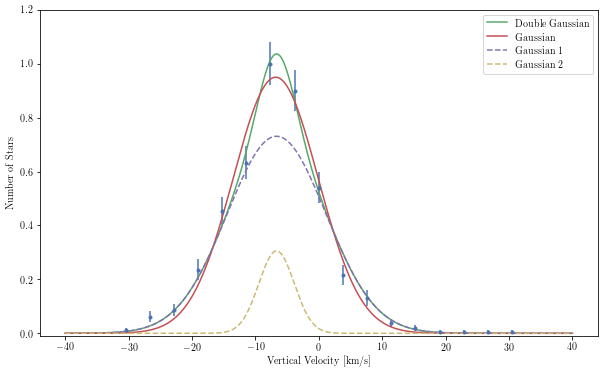

1: mu=-6.80, sigma=6.70, a=15.95
2: mu=-6.66, sigma1=7.79, a1=14.27, sigma2=2.79, a2=2.13
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

In [20]:
wedge = np.linspace(-40, 40, 22)
df, df_fit, name = get_fit(1, wedge)
# df.export(join(data_dir, name), progress=True)
df = vaex.from_pandas(df)
df_fit = vaex.from_pandas(df_fit)

n = name.split("_")
name = f"w_{n[1]}_{n[2]}.hdf5"
df.export(join(data_dir, name), progress=True)
df_fit.export(join(data_dir, "fit_"+name), progress=True)

862 2


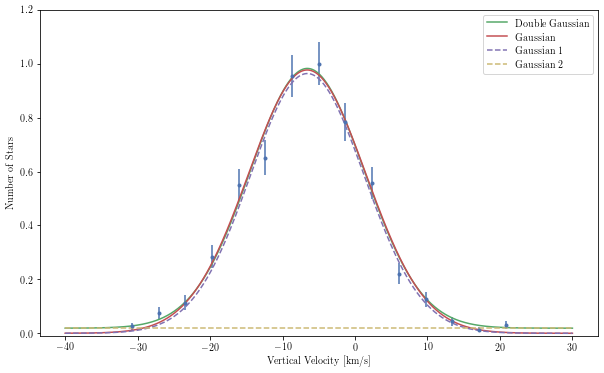

1: mu=-6.60, sigma=8.09, a=19.80
2: mu=-6.59, sigma1=7.86, a1=18.99, sigma2=7026.03, a2=333.75
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

In [21]:
wedge = np.linspace(-40, 30, 20)
df, df_fit, name = get_fit(2, wedge)
# df.export(join(data_dir, name), progress=True)
df = vaex.from_pandas(df)
df_fit = vaex.from_pandas(df_fit)

n = name.split("_")
name = f"w_{n[1]}_{n[2]}.hdf5"
df.export(join(data_dir, name), progress=True)
df_fit.export(join(data_dir, "fit_"+name), progress=True)

1132 3


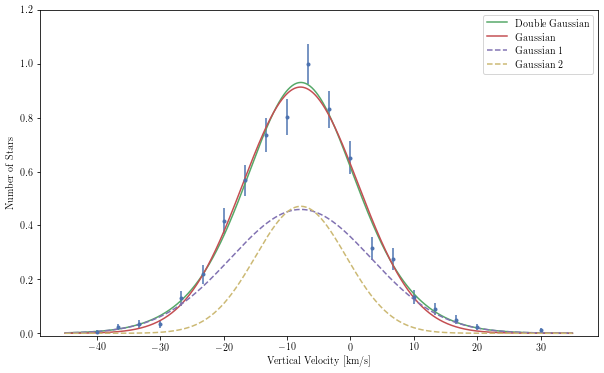

1: mu=-7.89, sigma=9.09, a=20.82
2: mu=-7.83, sigma1=11.08, a1=12.75, sigma2=7.13, a2=8.42
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

In [22]:
wedge = np.linspace(-45, 35, 25)
df, df_fit, name = get_fit(3, wedge)
# df.export(join(data_dir, name), progress=True)
df = vaex.from_pandas(df)
df_fit = vaex.from_pandas(df_fit)

n = name.split("_")
name = f"w_{n[1]}_{n[2]}.hdf5"
df.export(join(data_dir, name), progress=True)
df_fit.export(join(data_dir, "fit_"+name), progress=True)

1676 4


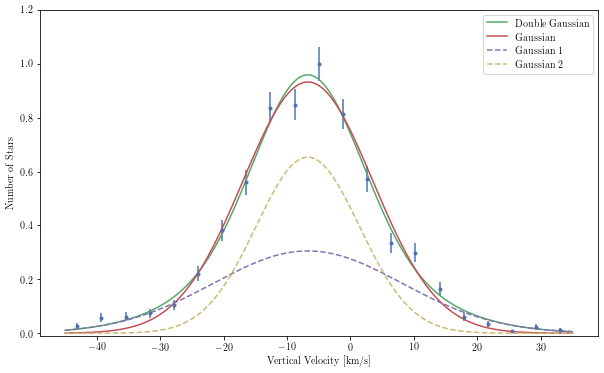

1: mu=-6.72, sigma=10.24, a=23.93
2: mu=-6.74, sigma1=14.91, a1=11.42, sigma2=8.17, a2=13.38
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

'w_(0.23)_(0.26).hdf5.hdf5'

In [23]:
wedge = np.linspace(-45, 35, 22)
df, df_fit, name = get_fit(4, wedge)
# df.export(join(data_dir, name), progress=True)
df = vaex.from_pandas(df)
df_fit = vaex.from_pandas(df_fit)

n = name.split("_")
name = f"w_{n[1]}_{n[2]}.hdf5"
df.export(join(data_dir, name), progress=True)
df_fit.export(join(data_dir, "fit_"+name), progress=True)
name

1446 5


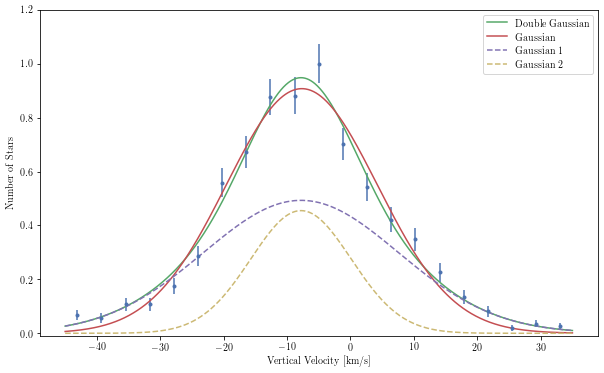

1: mu=-7.68, sigma=11.91, a=27.10
2: mu=-7.81, sigma1=15.39, a1=19.03, sigma2=7.91, a2=9.02
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

'w_(0.26)_(0.28).hdf5.hdf5'

In [24]:
wedge = np.linspace(-45, 35, 22)
df, df_fit, name = get_fit(5, wedge)
# df.export(join(data_dir, name), progress=True)
df = vaex.from_pandas(df)
df_fit = vaex.from_pandas(df_fit)

n = name.split("_")
name = f"w_{n[1]}_{n[2]}.hdf5"
df.export(join(data_dir, name), progress=True)
df_fit.export(join(data_dir, "fit_"+name), progress=True)
name

1816 6


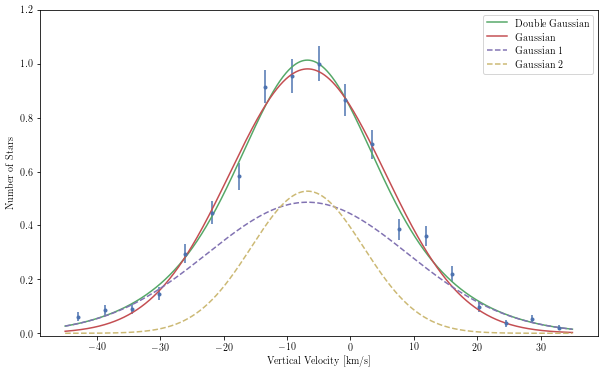

1: mu=-6.76, sigma=12.24, a=30.10
2: mu=-6.80, sigma1=15.85, a1=19.32, sigma2=8.85, a2=11.69
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

'w_(0.28)_(0.30).hdf5.hdf5'

In [25]:
wedge = np.linspace(-45, 35, 20)
df, df_fit, name = get_fit(6, wedge)
# df.export(join(data_dir, name), progress=True)
df = vaex.from_pandas(df)
df_fit = vaex.from_pandas(df_fit)

n = name.split("_")
name = f"w_{n[1]}_{n[2]}.hdf5"
df.export(join(data_dir, name), progress=True)
df_fit.export(join(data_dir, "fit_"+name), progress=True)
name

1956 7


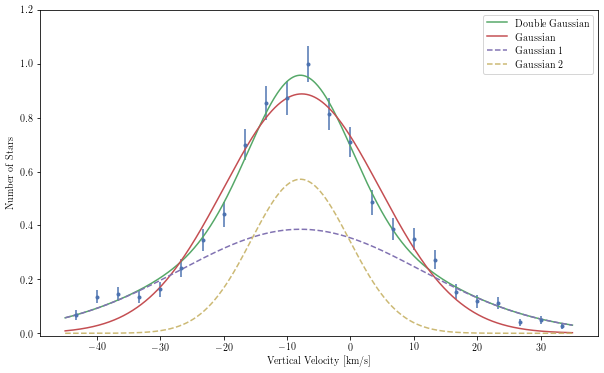

1: mu=-7.70, sigma=12.30, a=27.39
2: mu=-7.90, sigma1=19.01, a1=18.39, sigma2=7.73, a2=11.07
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

'w_(0.30)_(0.32).hdf5.hdf5'

In [26]:
wedge = np.linspace(-45, 35, 25)
df, df_fit, name = get_fit(7, wedge)
# df.export(join(data_dir, name), progress=True)
df = vaex.from_pandas(df)
df_fit = vaex.from_pandas(df_fit)

n = name.split("_")
name = f"w_{n[1]}_{n[2]}.hdf5"
df.export(join(data_dir, name), progress=True)
df_fit.export(join(data_dir, "fit_"+name), progress=True)
name

2187 8


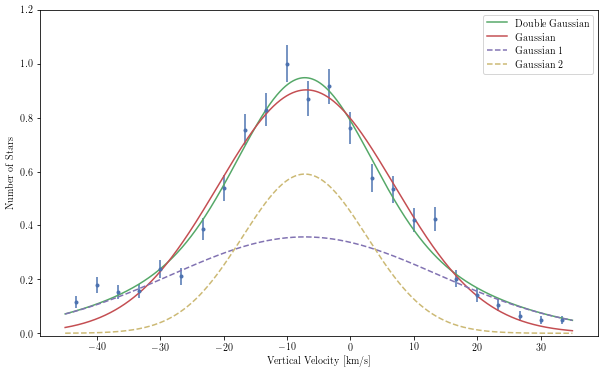

1: mu=-6.97, sigma=13.91, a=31.49
2: mu=-7.21, sigma1=21.07, a1=18.88, sigma2=9.81, a2=14.52
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

'w_(0.32)_(0.34).hdf5.hdf5'

In [27]:
wedge = np.linspace(-45, 35, 25)
df, df_fit, name = get_fit(8, wedge)
# df.export(join(data_dir, name), progress=True)
df = vaex.from_pandas(df)
df_fit = vaex.from_pandas(df_fit)

n = name.split("_")
name = f"w_{n[1]}_{n[2]}.hdf5"
df.export(join(data_dir, name), progress=True)
df_fit.export(join(data_dir, "fit_"+name), progress=True)
name

2449 9


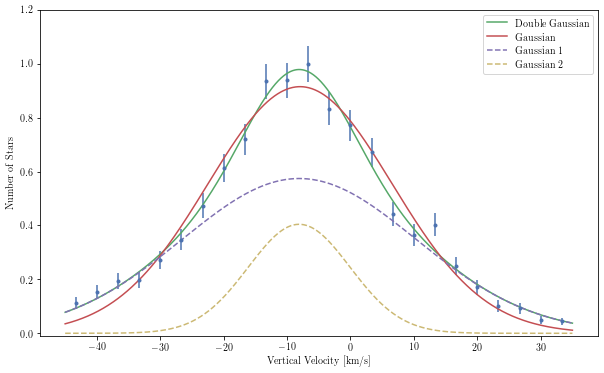

1: mu=-7.95, sigma=14.51, a=33.28
2: mu=-8.09, sigma1=18.46, a1=26.57, sigma2=8.03, a2=8.14
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

'w_(0.34)_(0.36).hdf5.hdf5'

In [28]:
wedge = np.linspace(-45, 35, 25)
df, df_fit, name = get_fit(9, wedge)
# df.export(join(data_dir, name), progress=True)
df = vaex.from_pandas(df)
df_fit = vaex.from_pandas(df_fit)

n = name.split("_")
name = f"w_{n[1]}_{n[2]}.hdf5"
df.export(join(data_dir, name), progress=True)
df_fit.export(join(data_dir, "fit_"+name), progress=True)
name

1294 10


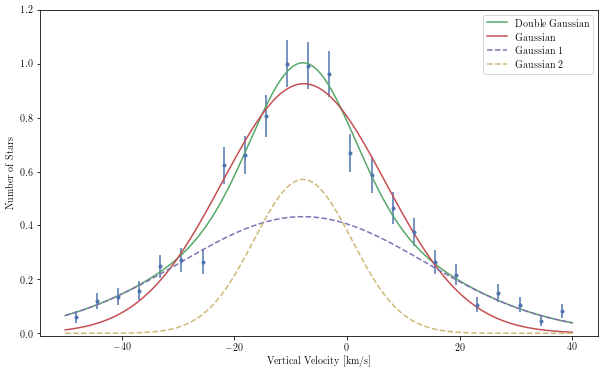

1: mu=-7.66, sigma=14.45, a=33.54
2: mu=-7.81, sigma1=21.76, a1=23.60, sigma2=8.69, a2=12.44
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

'w_(0.36)_(0.37).hdf5.hdf5'

In [29]:
wedge = np.linspace(-50, 40, 25)
df, df_fit, name = get_fit(10, wedge)
# df.export(join(data_dir, name), progress=True)
df = vaex.from_pandas(df)
df_fit = vaex.from_pandas(df_fit)

n = name.split("_")
name = f"w_{n[1]}_{n[2]}.hdf5"
df.export(join(data_dir, name), progress=True)
df_fit.export(join(data_dir, "fit_"+name), progress=True)
name

2437 11


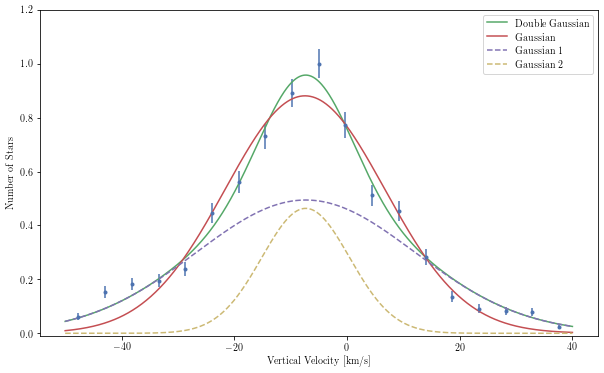

1: mu=-7.45, sigma=14.16, a=31.27
2: mu=-7.32, sigma1=19.42, a1=24.07, sigma2=7.79, a2=9.04
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

'w_(0.37)_(0.39).hdf5.hdf5'

In [30]:
wedge = np.linspace(-50, 40, 20)
df, df_fit, name = get_fit(11, wedge)
# df.export(join(data_dir, name), progress=True)
df = vaex.from_pandas(df)
df_fit = vaex.from_pandas(df_fit)

n = name.split("_")
name = f"w_{n[1]}_{n[2]}.hdf5"
df.export(join(data_dir, name), progress=True)
df_fit.export(join(data_dir, "fit_"+name), progress=True)
name

1103 12


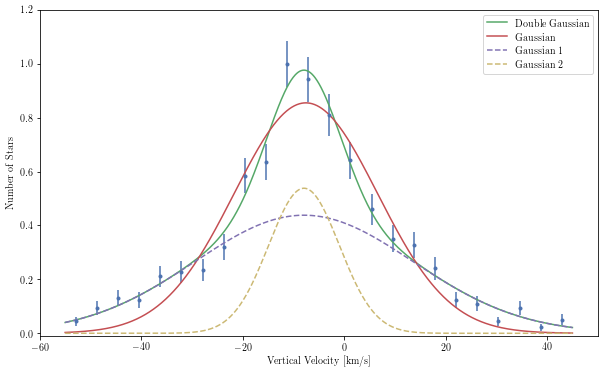

1: mu=-7.55, sigma=14.14, a=30.30
2: mu=-7.92, sigma1=21.53, a1=23.64, sigma2=6.98, a2=9.41
export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

'w_(0.39)_(0.40).hdf5.hdf5'

In [31]:
wedge = np.linspace(-55, 45, 25)
df, df_fit, name = get_fit(12, wedge)
# df.export(join(data_dir, name), progress=True)
df = vaex.from_pandas(df)
df_fit = vaex.from_pandas(df_fit)

n = name.split("_")
name = f"w_{n[1]}_{n[2]}.hdf5"
df.export(join(data_dir, name), progress=True)
df_fit.export(join(data_dir, "fit_"+name), progress=True)
name

In [32]:
fit_files = glob(join(data_dir, "fit_*"))
fit_files.sort()
fit_files

['/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/fit_w_(-0.10)_(0.10).hdf5.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/fit_w_(0.10)_(0.16).hdf5.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/fit_w_(0.16)_(0.20).hdf5.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/fit_w_(0.20)_(0.23).hdf5.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/fit_w_(0.23)_(0.26).hdf5.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/fit_w_(0.26)_(0.28).hdf5.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/fit_w_(0.28)_(0.30).hdf5.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/fit_w_(0.30)_(0.32).hdf5.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/fit_w_(0.32)_(0.34).hdf5.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no/fit_w_(0.34)_(0.36).hdf5.hdf5',
 '/home2/s20321005/Thesis-Project/Data/

In [33]:
df = vaex.open_many(fit_files)
df

#,mu,sigma,a,mu_2,sigma1_2,a1_2,sigma2_2,a2_2
0,-6.454626285252227,5.456816971683828,13.502208545263452,-6.462719936039687,6.425802927655916,11.880950892396433,2.4131372181141977,2.0311988786586506
1,-6.797334881540252,6.697423566802898,15.948646562991955,-6.657922472126864,7.7888677550059136,14.270896039973218,2.787455363468368,2.134652682893314
2,-6.6001279341235,8.085124963421745,19.79799087644364,-6.585463325390303,7.862773416804399,18.992279507152755,7026.031556593699,333.747885208063
3,-7.885952441112951,9.091416366236695,20.81608035430626,-7.832329836654963,11.075060715673843,12.754928298059465,7.132114700250049,8.421828198876433
4,-6.719185202872317,10.23958821173924,23.92872461072312,-6.737123797971492,14.907224247497545,11.415518812778465,8.168865535996817,13.376129988590538
...,...,...,...,...,...,...,...,...
8,-6.968875099394748,13.912565177782923,31.491201308133938,-7.208201481194341,21.066867401289045,18.881870153700092,9.805658745037132,14.517300928993901
9,-7.951785226902026,14.511579381424077,33.28084515431518,-8.093418595615049,18.462911123497523,26.574065434780106,8.026563493156763,8.135255840146488
10,-7.65896284349785,14.452416733631713,33.53902661631963,-7.810932654057014,21.759529766010875,23.59969637649041,8.691734861813899,12.435991018283596
11,-7.450280869299207,14.163341758029103,31.274698083576368,-7.322211890635213,19.416786306712346,24.065889892886865,7.785815381692282,9.044206535702603


In [34]:
df = df.to_pandas_df()
df

,mu,sigma,a,mu_2,sigma1_2,a1_2,sigma2_2,a2_2
0,-6.454626,5.456817,13.502209,-6.462720,6.425803,11.880951,2.413137,2.031199
1,-6.797335,6.697424,15.948647,-6.657922,7.788868,14.270896,2.787455,2.134653
2,-6.600128,8.085125,19.797991,-6.585463,7.862773,18.992280,7026.031557,333.747885
3,-7.885952,9.091416,20.816080,-7.832330,11.075061,12.754928,7.132115,8.421828
4,-6.719185,10.239588,23.928725,-6.737124,14.907224,11.415519,8.168866,13.376130
5,-7.679281,11.912191,27.099886,-7.807912,15.391735,19.027054,7.908953,9.021558
6,-6.761264,12.242915,30.101286,-6.795802,15.852552,19.319986,8.845684,11.690244
7,-7.696758,12.303313,27.386646,-7.902654,19.007933,18.385136,7.730522,11.073508
8,-6.968875,13.912565,31.491201,-7.208201,21.066867,18.881870,9.805659,14.517301
9,-7.951785,14.511579,33.280845,-8.093419,18.462911,26.574065,8.026563,8.135256


['0.16', '0.20']
['0.39', '0.40']


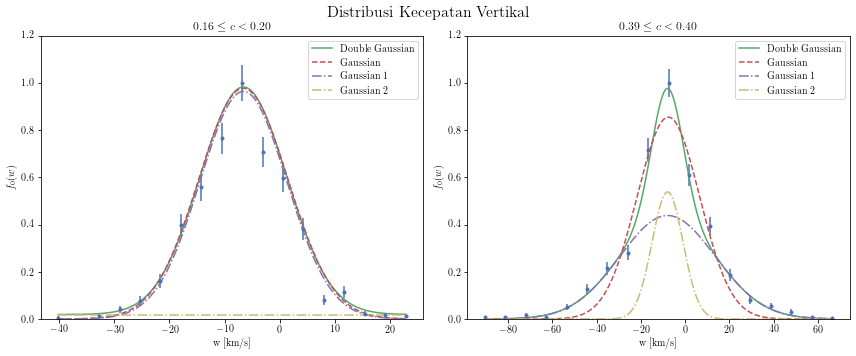

In [36]:
import re

# regex number between ()
regex = re.compile(r'\(([^)]+)\)')

def get_v(index):
    gaia_raw = vaex.open(files[index])
    gaia = gaia_raw.filter("abs(z)<50")
    gaia['f'] = gaia_raw.evaluate("e_w/abs(w)")
    mask = (gaia['f']<0.1) | (gaia['e_w']<1)
    gaia = gaia[mask]
    gaia = gaia.extract()
    ws = gaia['w'].to_numpy()
    wmean = np.mean(ws)
    wstd = np.std(ws)
    wedge = np.linspace(wmean-4*wstd, wmean+4*wstd, 20)
    wmid = (wedge[1:] + wedge[:-1]) / 2
    wnum, _ = np.histogram(ws, wedge)
    mask = wnum > 0
    wmid = wmid[mask]
    wnum = wnum[mask]
    werr = np.sqrt(wnum)

    # print(len(ws), index)
    area = wnum.sum() * (wedge[1] - wedge[0])
    return wmid, wnum/area, werr/area

w12, n12, e12 = get_v(12)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, ax in zip([2, 12], axes):
    wmid, wnum, werr = get_v(i)
    max = np.max(wnum)
    werr, wnum = werr/max, wnum/max
    popt1 = df['mu'][i], df['sigma'][i], df['a'][i]
    popt2 = df['mu_2'][i], df['sigma1_2'][i], df['a1_2'][i], df['sigma2_2'][i], df['a2_2'][i]
    ws = np.linspace(np.min(wmid), np.max(wmid), 1000)
    fw1 = gaussian(ws, *popt1)
    fw2 = double_gaussian(ws, *popt2)
    name = files[i].split('/')[-1]
    c = re.findall(regex, name)
    print(c)

    ax.errorbar(wmid, wnum, yerr=werr, fmt='.')
    ax.plot(ws, fw2, label="Double Gaussian")
    ax.plot(ws, fw1, label="Gaussian", ls="--")
    ax.plot(ws, gaussian(ws, popt2[0], popt2[1], popt2[2]), label="Gaussian 1", ls="-.")
    ax.plot(ws, gaussian(ws, popt2[0], popt2[3], popt2[4]), label="Gaussian 2", ls="-.")
    ax.set_xlabel("w [km/s]")
    ax.set_ylabel(r"$f_0(w)$")
    ax.legend()
    ax.set_title(r"${}\leq c<{}$".format(c[0], c[1]))
    ax.set_ylim(0, np.max(wnum)*1.2)
fig.suptitle("Distribusi Kecepatan Vertikal", fontsize=16)
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.savefig(join("img", "w-dist.pdf"), dpi=300)
plt.show()

